In [1]:
import networkx as nx
from networkx.algorithms.approximation import clique
import matplotlib.pyplot as plt


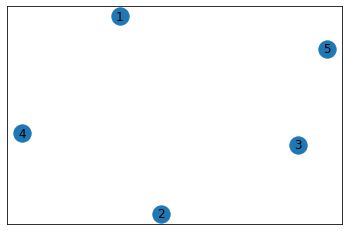

In [2]:
G = nx.Graph()
G.add_node(1) 
G.add_nodes_from([2,3,4,5])
nx.draw_networkx(G)

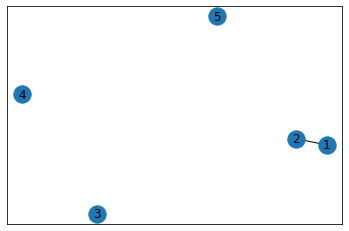

In [3]:
G.add_edge(1,2)
nx.draw_networkx(G)


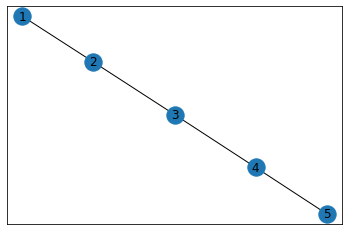

In [4]:
G.add_edges_from([(2,3), (3,4), (4,5)]) 
nx.draw_networkx(G)


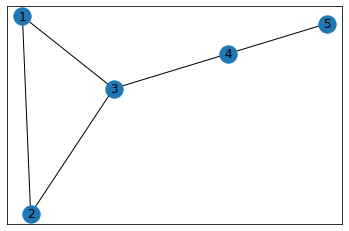

In [5]:
G.add_edge(1,3)
nx.draw_networkx(G)


In [6]:
list(nx.find_cliques(G))

[[3, 1, 2], [3, 4], [5, 4]]

In [7]:
clique.max_clique(G)

{1, 2, 3}

### Creating a directed graph

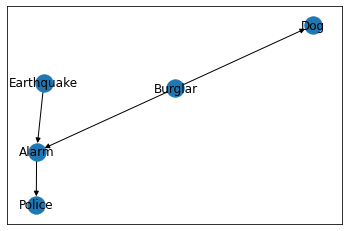

In [8]:
g = nx.DiGraph()
g.add_edges_from([('Burglar', 'Dog'), ('Burglar','Alarm'), ('Earthquake', 'Alarm'), ('Alarm','Police')])
nx.draw_networkx(g)


In [9]:
positions={'Burglar':(2,6), 'Earthquake':(4,6), 'Alarm':(3,4), 'Dog':(1.5,3), 'Police':(3,1)}

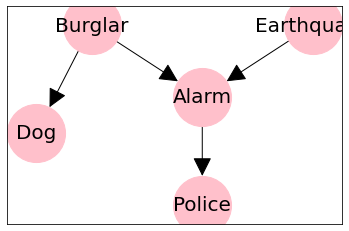

In [10]:
nx.draw_networkx(g,node_color='pink',node_size=15**3,font_size=20,arrowsize=40,pos=positions)

In [11]:
plt.savefig('test.png');

<Figure size 432x288 with 0 Axes>

In [12]:
a = nx.to_pandas_adjacency(g)
a

,Burglar,Dog,Alarm,Earthquake,Police
Burglar,0.0,1.0,1.0,0.0,0.0
Dog,0.0,0.0,0.0,0.0,0.0
Alarm,0.0,0.0,0.0,0.0,1.0
Earthquake,0.0,0.0,1.0,0.0,0.0
Police,0.0,0.0,0.0,0.0,0.0


In [13]:
nx.to_pandas_edgelist(g)

,source,target
0,Burglar,Dog
1,Burglar,Alarm
2,Alarm,Police
3,Earthquake,Alarm


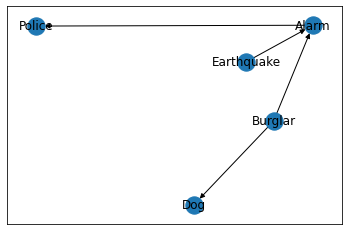

In [14]:
f = nx.DiGraph(a)
nx.draw_networkx(f)

### Bayesian Network

In [15]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import pgmpy.inference
from IPython.display import Image

In [16]:
Image('graph.png')

FileNotFoundError: No such file or directory: 'graph.png'

FileNotFoundError: No such file or directory: 'graph.png'

<IPython.core.display.Image object>

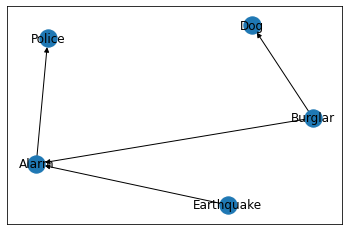

In [17]:
bn = BayesianModel([('Burglar', 'Dog'), ('Burglar','Alarm'), ('Earthquake', 'Alarm'), ('Alarm','Police')])
nx.draw_networkx(bn)

In [18]:
cpd_Alarm = TabularCPD('Alarm', variable_card=2, 
                    values=[
                        [0.98, 0.3, 0.4, 0.1],
                        [0.02, 0.7, 0.6, 0.9]
                    ], 
                    evidence= ['Earthquake', 'Burglar'],
                    evidence_card=[2, 2])
print(cpd_Alarm)

+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(0) | Earthquake(1) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Burglar    | Burglar(0)    | Burglar(1)    | Burglar(0)    | Burglar(1)    |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.98          | 0.3           | 0.4           | 0.1           |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.02          | 0.7           | 0.6           | 0.9           |
+------------+---------------+---------------+---------------+---------------+


In [19]:
cpd_Police = TabularCPD('Police', variable_card=2, values=[[0.95, 0.02], [0.05, 0.98]], evidence=['Alarm'], evidence_card=[2])
cpd_Burglar = TabularCPD('Burglar', variable_card=2, values=([[0.5,0.5]]))
cpd_Earthquake = TabularCPD('Earthquake', variable_card=2, values=([[0.5,0.5]]))
cpd_Dog = TabularCPD('Dog', variable_card=2, values=([[0.8, 0.1], [0.2, 0.9]]), evidence=['Burglar'], evidence_card=[2])

ValueError: values must be of shape (2, 1). Got shape: (1, 2)

In [20]:
bn.add_cpds(cpd_Police, cpd_Earthquake, cpd_Alarm, cpd_Burglar, cpd_Dog)

In [21]:
bn.check_model()

True

In [22]:
print(bn.get_cpds('Dog'))

+---------+-----------+-----------+
| Burglar | Burglar_0 | Burglar_1 |
+---------+-----------+-----------+
| Dog_0   | 0.8       | 0.1       |
+---------+-----------+-----------+
| Dog_1   | 0.2       | 0.9       |
+---------+-----------+-----------+


In [23]:
bn.get_cpds()

[<TabularCPD representing P(Police:2 | Alarm:2) at 0x7f1108a89c18>,
 <TabularCPD representing P(Earthquake:2) at 0x7f1108a89eb8>,
 <TabularCPD representing P(Alarm:2 | Earthquake:2, Burglar:2) at 0x7f1112d0a9e8>,
 <TabularCPD representing P(Burglar:2) at 0x7f1108a89d68>,
 <TabularCPD representing P(Dog:2 | Burglar:2) at 0x7f1108a89e48>]

### Three basic structures and independencies

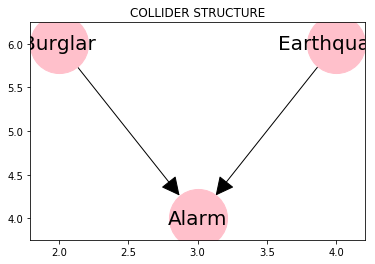

In [24]:
nx.draw_networkx(bn.subgraph(['Alarm', 'Earthquake', 'Burglar']),
                 pos=positions, node_size=15**3, node_color='pink', font_size=20, arrowsize=40)

plt.title('COLLIDER STRUCTURE');

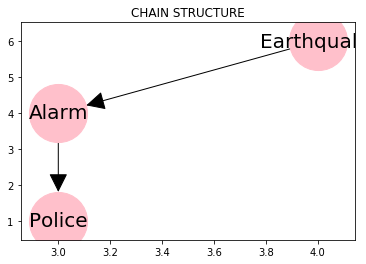

In [25]:
nx.draw_networkx(bn.subgraph(['Alarm', 'Earthquake', 'Police']),
                 pos=positions, node_size=15**3, node_color='pink', font_size=20, arrowsize=40)

plt.title('CHAIN STRUCTURE');

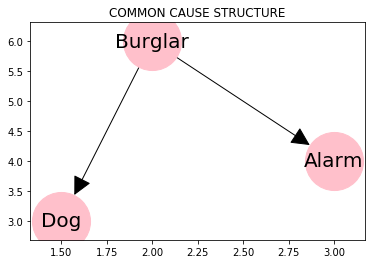

In [26]:
nx.draw_networkx(bn.subgraph(['Dog', 'Alarm', 'Burglar']),
                 pos=positions, node_size=15**3, node_color='pink', font_size=20, arrowsize=40)

plt.title('COMMON CAUSE STRUCTURE');

In [27]:
bn.is_active_trail(start='Earthquake', end='Burglar')

False

In [28]:
bn.is_active_trail(start='Earthquake', end='Burglar', observed=['Police'])

True

In [29]:
bn.get_independencies()

(Burglar _|_ Earthquake)
(Burglar _|_ Police | Alarm)
(Burglar _|_ Earthquake | Dog)
(Burglar _|_ Police | Alarm, Earthquake)
(Burglar _|_ Police | Alarm, Dog)
(Burglar _|_ Police | Alarm, Earthquake, Dog)
(Dog _|_ Earthquake)
(Dog _|_ Police | Alarm)
(Dog _|_ Police, Alarm, Earthquake | Burglar)
(Dog _|_ Alarm, Earthquake | Police, Burglar)
(Dog _|_ Police | Alarm, Earthquake)
(Dog _|_ Police, Alarm | Burglar, Earthquake)
(Dog _|_ Police, Earthquake | Alarm, Burglar)
(Dog _|_ Alarm | Police, Burglar, Earthquake)
(Dog _|_ Earthquake | Police, Alarm, Burglar)
(Dog _|_ Police | Burglar, Alarm, Earthquake)
(Alarm _|_ Dog | Burglar)
(Alarm _|_ Dog | Police, Burglar)
(Alarm _|_ Dog | Burglar, Earthquake)
(Alarm _|_ Dog | Police, Burglar, Earthquake)
(Earthquake _|_ Burglar, Dog)
(Earthquake _|_ Police | Alarm)
(Earthquake _|_ Dog | Burglar)
(Earthquake _|_ Burglar | Dog)
(Earthquake _|_ Dog | Police, Burglar)
(Earthquake _|_ Police, Dog | Alarm, Burglar)
(Earthquake _|_ Police | Alarm, Dog)